In [1]:
import pandas as pd
import numpy as np


In [106]:
df1=pd.read_csv("loan/loan.csv",low_memory=False)
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [76]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [77]:
df1.shape

(39717, 111)

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Drop columns with ALL NaN values


In [80]:
df1=df1.dropna(axis=1, how='all')
df1.shape


(39717, 57)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [42]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [43]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Drop columns which are not useful for analysis


In [82]:
df1=df1.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq','delinq_amnt','tax_liens','url'],axis=1)
df1.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prnc

### Data Cleaning
#### Fill the missing values with detault values

In [110]:
df1.emp_title.value_counts()
df1.emp_title = df1.emp_title.fillna("Other")
df1.emp_length.value_counts()
df1.emp_length=df1.emp_length.fillna("-1 years")

In [111]:
df1.title=df1.title.fillna("Others")

In [112]:

df1.revol_util=df1.revol_util.fillna("-1")
df1.revol_util.value_counts()

0%        977
0.20%      63
63%        62
0.10%      58
66.70%     58
         ... 
77.63%      1
25.74%      1
62.31%      1
0.83%       1
7.28%       1
Name: revol_util, Length: 1090, dtype: int64

In [114]:

df1.pub_rec_bankruptcies = df1.pub_rec_bankruptcies.fillna(df1.pub_rec_bankruptcies.mode()[0])
df1.pub_rec_bankruptcies.value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [116]:
#pub_rec_bankruptcies can be converted in int as it cannot be floating numbers
df1.pub_rec_bankruptcies = df1.pub_rec_bankruptcies.apply(lambda x : int(x))
df1.pub_rec_bankruptcies.value_counts()

0    38036
1     1674
2        7
Name: pub_rec_bankruptcies, dtype: int64

In [117]:
df1.zip_code = df1.zip_code.apply(lambda x : int(x[:3]) if x[-2:] == "xx" else int(x))
df1.zip_code.value_counts()

100    597
945    545
112    516
606    503
70     473
      ... 
381      1
378      1
739      1
396      1
469      1
Name: zip_code, Length: 823, dtype: int64

In [118]:
df1.revol_util = df1.revol_util.apply(lambda x : float(x[:-1]) if x[-1]=="%" else float(x))
df1.revol_util.value_counts()

0.00     977
0.20      63
63.00     62
0.10      58
66.70     58
        ... 
77.63      1
25.74      1
62.31      1
0.83       1
7.28       1
Name: revol_util, Length: 1090, dtype: int64

In [119]:
df1.annual_inc = df1.annual_inc.apply(lambda x : int(round(x,0)))
df1.annual_inc.value_counts()

60000     1505
50000     1058
40000      876
45000      830
30000      825
          ... 
23631        1
25404        1
47508        1
130490       1
27376        1
Name: annual_inc, Length: 5280, dtype: int64

In [120]:
df1.int_rate = df1.int_rate.apply(lambda x : float(x[:-1]) if x[-1]=="%" else float(x))
df1.int_rate.value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [15]:
df1.title.value_counts().sort_values(ascending=False).sample(50)

Balloon Payoff                                          1
Tony's Loan                                             1
mark                                                    1
adil                                                    1
Debt Consolidation Streamline Loan                      1
IRS & State Tax Pay-Off                                 1
my car                                                  1
hidey ho                                                1
DEBT CONSOLIDATION LOAN                                 5
Mauricio                                                1
Tractor Loan                                            1
CONSOLIDATE BILLS                                       1
My Vision                                               1
Our Wedding                                             6
Plastic                                                 1
Citibank&BestBuy                                        1
T's Car Loan                                            1
land          

### Univariate Analysis


In [153]:
#import for the plotting graph with matplotlib and seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [151]:
import seaborn as sns

Text(0, 0.5, 'count')

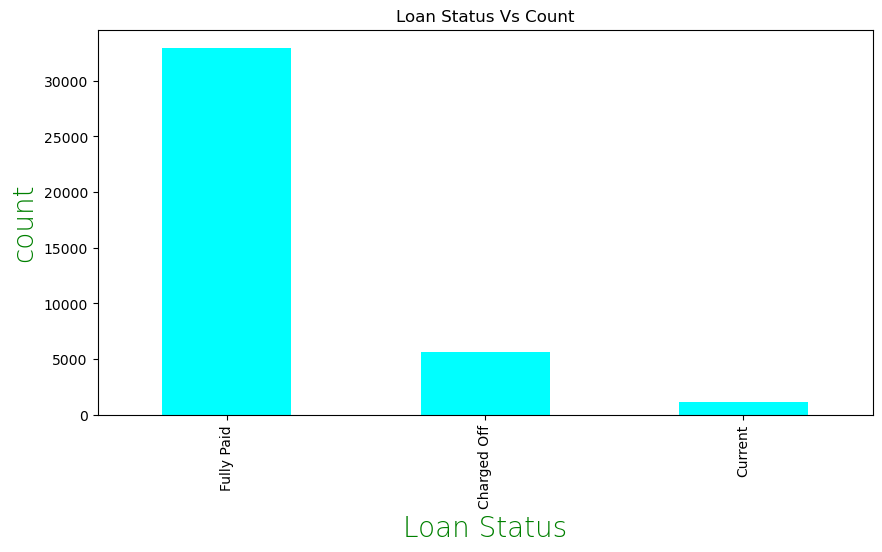

In [95]:
#analyzing how many fully paind, Charged off, current

df1.loan_status.value_counts().plot(kind='bar',figsize=(10,5),
                                         title='Loan Status Vs Count',
                                         color='cyan')

#Labeling Axis

plt.xlabel("Loan Status", fontdict={'fontsize':20, 'fontweight':5,'color':'Green'})
plt.ylabel("count", fontdict={'fontsize':20, 'fontweight':5,'color':'Green'})

In [122]:
#Filtering the rows only with Charged Off and Current status
df2=df1[~(df1.loan_status=='Fully Paid')]
df3=df2[df2.loan_status=='Charged Off']

Text(0, 0.5, 'count')

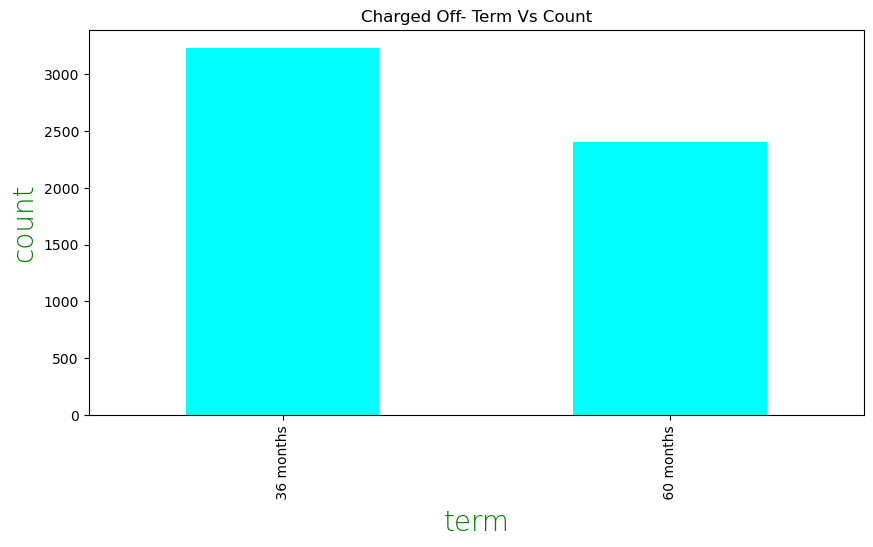

In [123]:
df3.term.value_counts().plot(kind='bar',figsize=(10,5),
                                         title='Charged Off- Term Vs Count',
                                         color='cyan')
#Labeling Axis

plt.xlabel("term", fontdict={'fontsize':20, 'fontweight':5,'color':'Green'})
plt.ylabel("count", fontdict={'fontsize':20, 'fontweight':5,'color':'Green'})

<AxesSubplot:xlabel='addr_state', ylabel='count'>

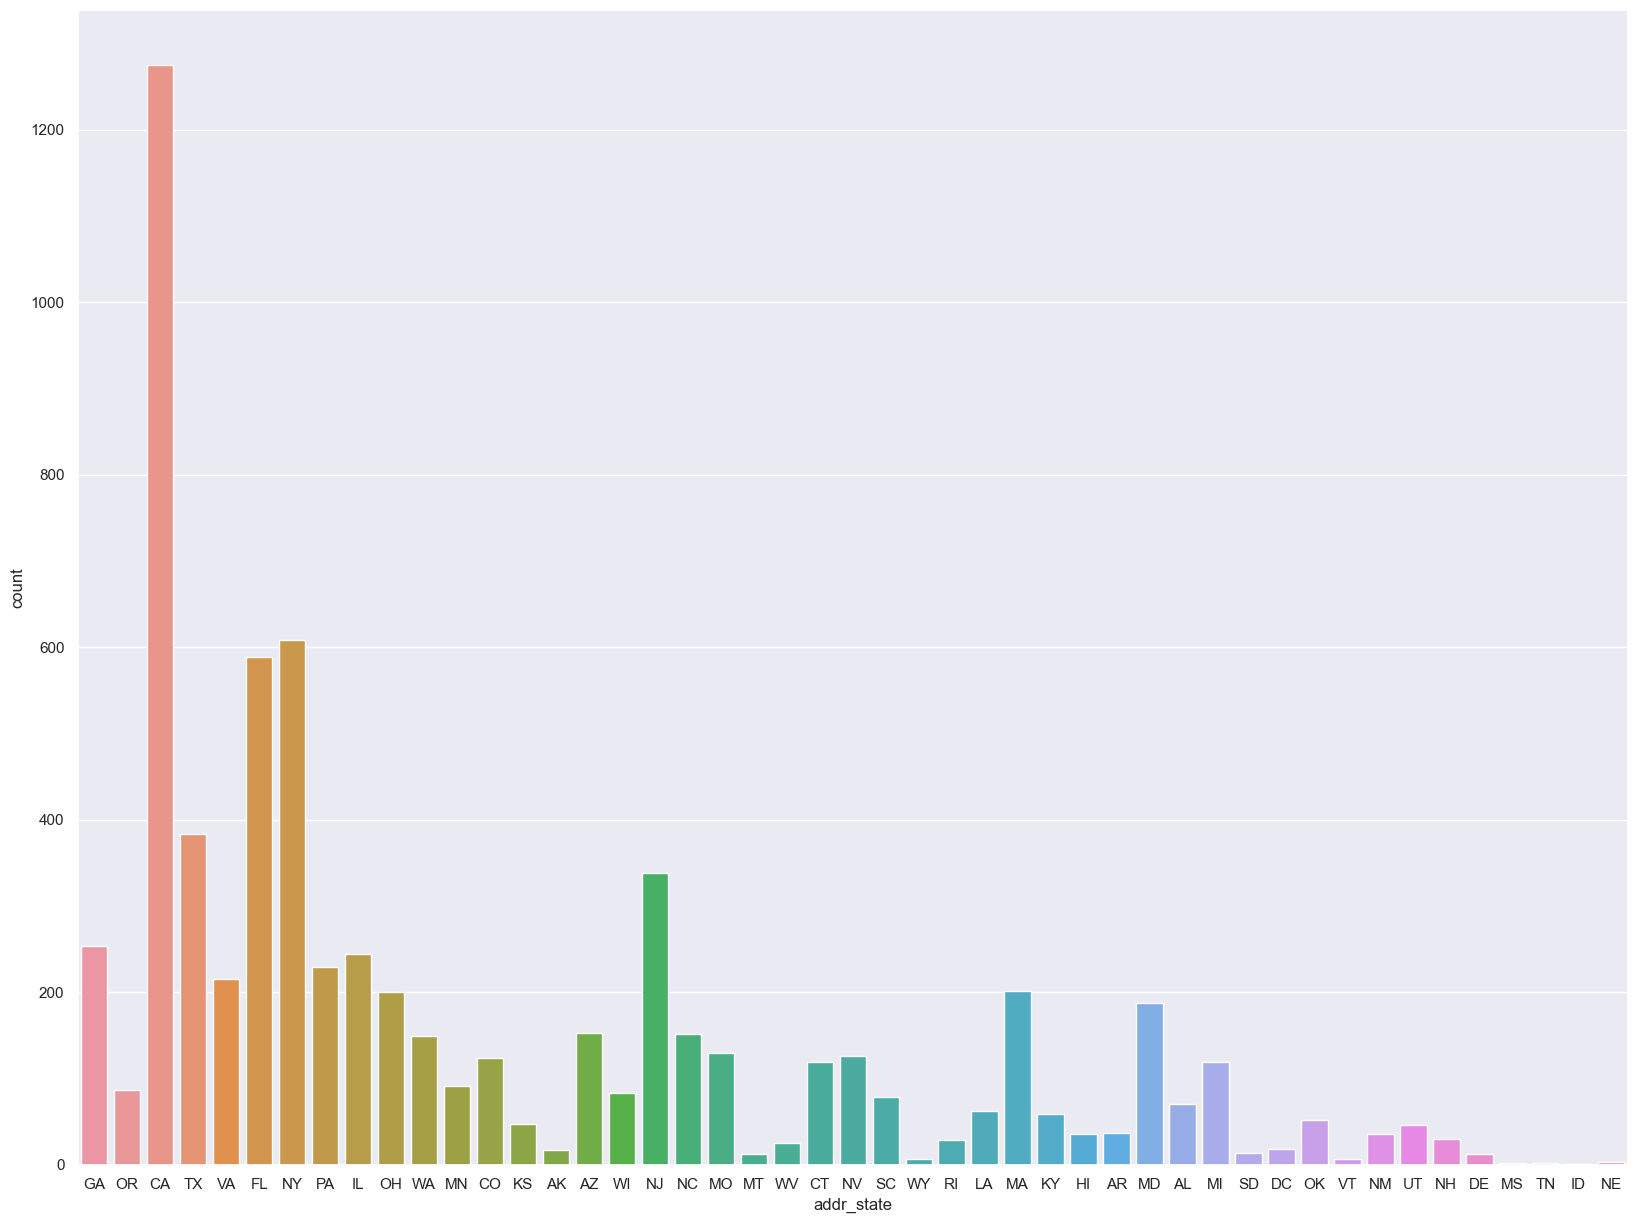

In [166]:
sns.set(rc={'figure.figsize':(20,15)})
sns.countplot(df2['addr_state'])

In [129]:
# cleaning
#df3["emp_length"]= df3["emp_length"].str.replace("10+ years", "10")
#df3["emp_length"]= df3["emp_length"].str.replace("< 1 year", "0")
#df3["emp_length"]= df3["emp_length"].str.replace("years", "")
#df3["emp_length"]= df3["emp_length"].str.replace("year", "")
#df3["emp_length"]= df3["emp_length"].str.replace("+", "")
df3["emp_length"].value_counts()


10     1331
0       639
2       567
3       555
4       462
5       458
1       456
6       307
7       263
-1      228
8       203
9       158
Name: emp_length, dtype: int64

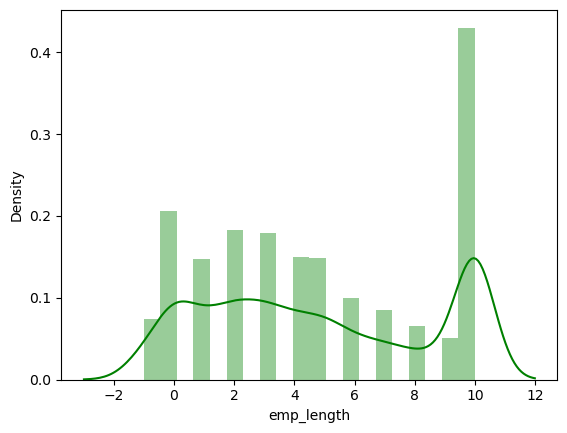

In [156]:
#plt.hist(df3.emp_length, bins=20,edgecolor='orange',color='cyan')
#plt.tittle("Distribution of Loan status Vs Employee expereince", fontsize=10)

sns.distplot(df3.emp_length, bins=20,color='Green')
plt.show()

<AxesSubplot:xlabel='purpose', ylabel='count'>

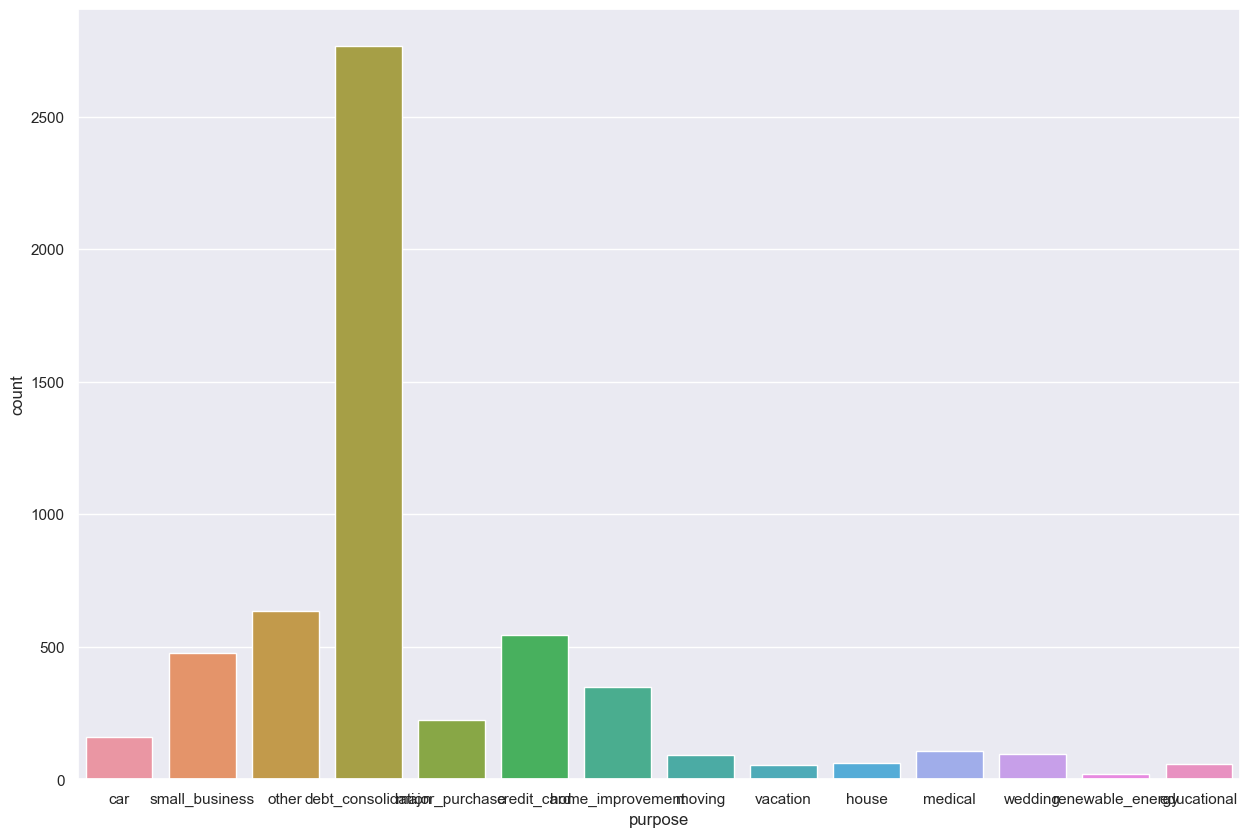

In [165]:


sns.set(rc={'figure.figsize':(15,10)})

sns.countplot(df3['purpose'])

#df3.purpose.value_counts().plot(kind='bar',figsize=(10,5),title='Charged Off- Purpose Vs Count',color='cyan')
#Labeling Axis

#plt.xlabel("Purpose", fontdict={'fontsize':20, 'fontweight':5,'color':'Green'})
#plt.ylabel("count", fontdict={'fontsize':20, 'fontweight':5,'color':'Green'})

## Segmented Univariate Analysis

In [159]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

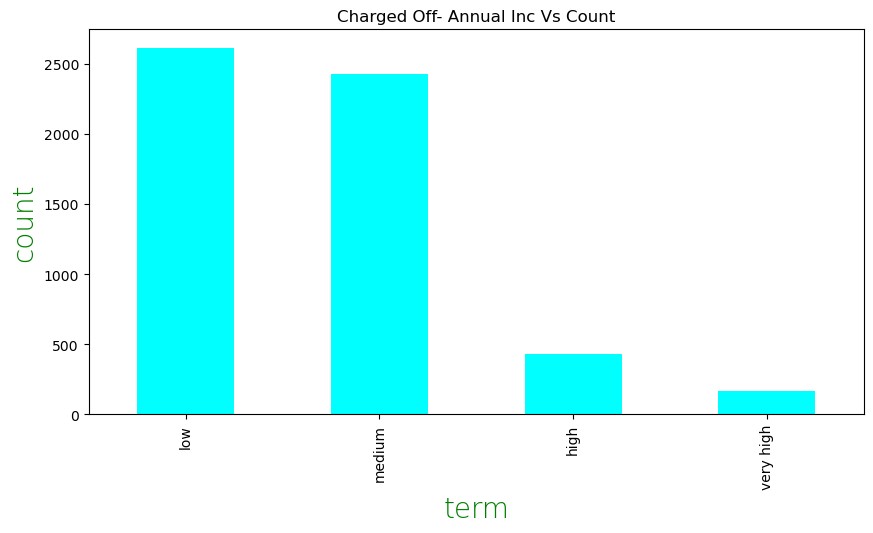

In [146]:
df3['annual_inc_seg'] =df3['annual_inc'].apply(lambda x: annual_income(x))
df3.annual_inc_seg.value_counts().plot(kind='bar',figsize=(10,5),
                                         title='Charged Off- Annual Inc Vs Count',
                                         color='cyan')
#Labeling Axis

plt.xlabel("term", fontdict={'fontsize':20, 'fontweight':5,'color':'Green'})
plt.ylabel("count", fontdict={'fontsize':20, 'fontweight':5,'color':'Green'})
plt.show()

## Bivariate Analysis

### Using Categorical Variables

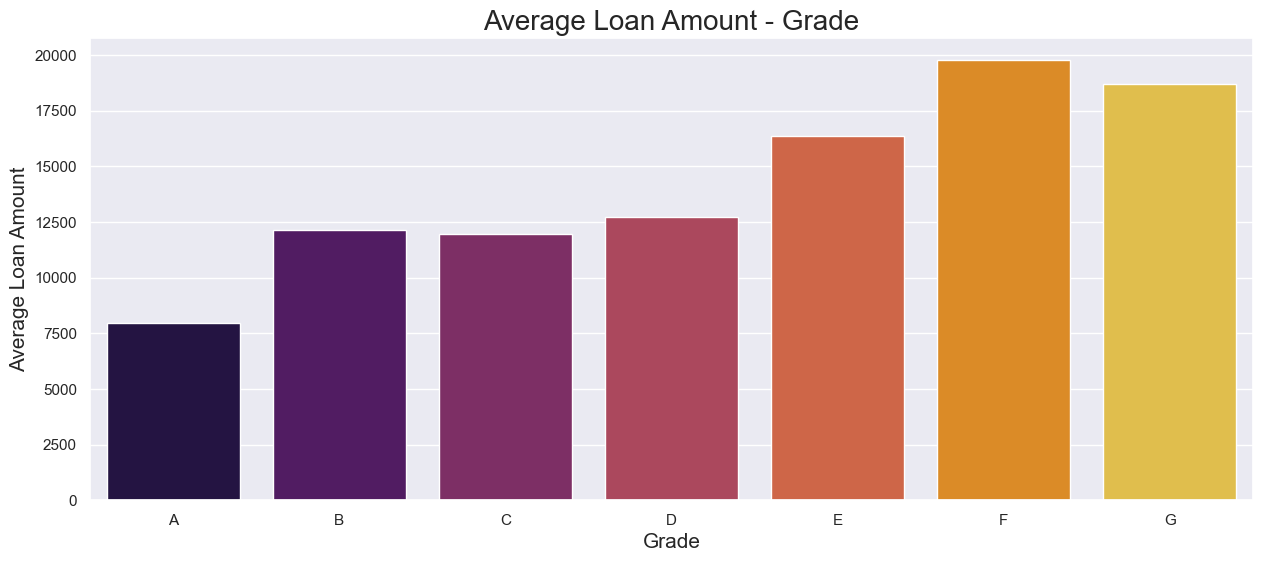

In [162]:
loan_grades = df2.groupby("grade").mean().reset_index()

sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='grade', y='loan_amnt', data=loan_grades, palette='inferno')
plt.title("Average Loan Amount - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Average Loan Amount", fontsize=15);

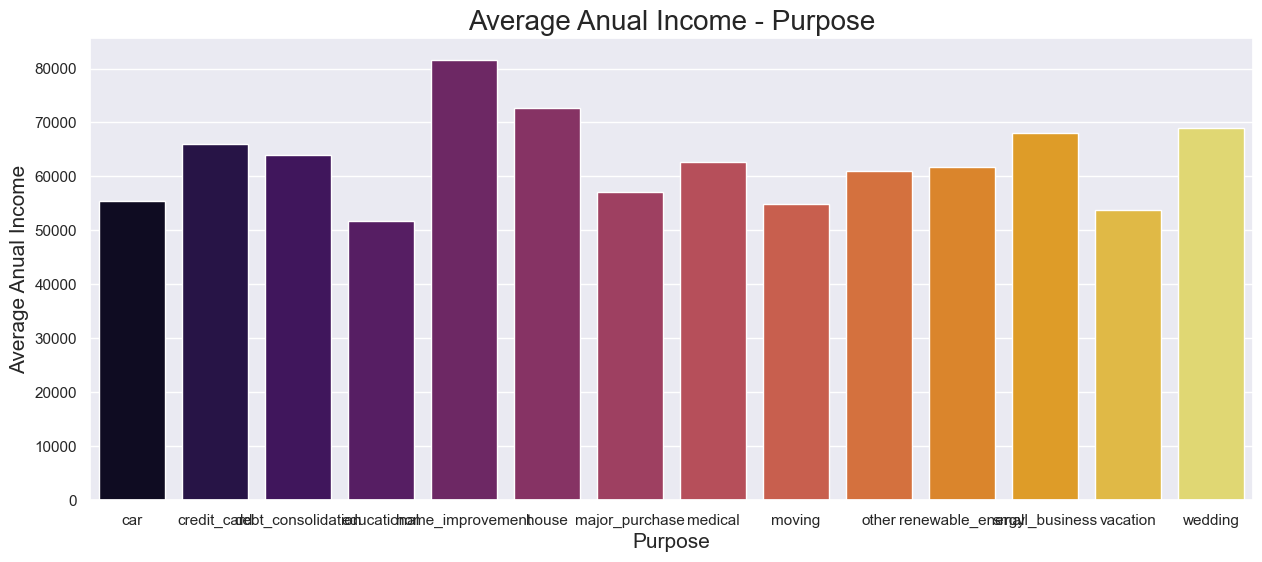

In [163]:
AVG_inc = df2.groupby("purpose").mean().reset_index()

sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='purpose', y='annual_inc', data=AVG_inc, palette='inferno')
plt.title("Average Anual Income - Purpose", fontsize=20)
plt.xlabel("Purpose", fontsize=15)
plt.ylabel("Average Anual Income", fontsize=15);

## Summary
#### 1. Higher percentage of Loan Borrowers are defaulting with term of 36 months
#### 2. Individual Loan Borrowers are defaulting more 
#### 3. People with less than 1 lakh income are having high percentage to Default
#### 4. Individuals with Grade D to G with higher income have high likely hood to default
#### 5. People who took Loan with reason 'Debt-consolidation' are identified as more Defaulters
#### 6. Maximum Loan Defaulters are from states CA, FL, NY, TX, NJ